# Lecture 1: What Data Science Can Tell Us About the World

##### For our first exercise, we'll be using Jupyter, Python 3.6, and the Pandas package to analyze a data set. 


## Preamble.

This exercise will be an extreme crash course in Python. If you're not familiar with Python, don't worry, it's easy! Future datacamp exercises will focus on the fundamentals of the language. Today's exercise will just involve tweaking some pre-written code. 

A couple of notes:
* We're using a jupyter notebook, a web-browser based interactive programming environment that allows you to execute "cells" or blocks of code in chunks. Any variables you assign will persist across different cells. 
* To execute a block of code, hit "shift" + "enter". Alternatively, you can use the "Run cell" button in the toolbar above. 






The first thing we do when creating a new Jupyter notebook is import all of the packages we'll need for our analysis. For today's example, we just need the pandas package, which we'll alias as pd. 

In [1]:
import pandas as pd

%matplotlib inline

Great. We're in business. But first, it's time for:

### *A Very, Very Brief Overview of Python*

Just for practice, we can assign a variable, print a statement, and modify the variable.  

In [2]:
a = 3
print('Using Python like a rockstar')

Using Python like a rockstar


In [3]:
a = a + 2
a

5

As a reminder, variables in Python are dynamically typed, so we can assign a string to our *a* variable, which was previously a *int*. 

In [4]:
a = 'crazy!'
print('This is ' + a)

This is crazy!


## Our Data.

This course is focused on using data to make sense of the world, so we'll do lots of hands on work with data. Each week, we'll explore a data set together, and see what we can learn about the world. 

### H1-B Visa Data. 

H1-B visas are among the most commonly used visas to hire skilled foreign workers in technology, finance, and other sectors. The government publicly discloses roles, titles, and pay for 1,000s of workers in the U.S. This publicly available gives us a sense of the going rate for data analysts, scientist, and engineers around the U.S. 

H1B data is made publicly available by the U.S. Department of Labor, and can be found [here](https://www.foreignlaborcert.doleta.gov/performancedata.cfm). Record layouts, including column definitions, are avilable [here](https://www.foreignlaborcert.doleta.gov/pdf/PerformanceData/2018/H-1B_FY18_Record_Layout_Q3.pdf) The CSV downloaded in this file in an extract of cases submitted in Q2 2018 from the most recent update to the data available in August 2018. 


#### Load data. 
Let's use the pandas package to load our data file into a dataframe. We're reading this from the web, but that's not problem, and we can handle the whole operation easily in one line. Note that pandas may warn us that the columns in the file contain mixed data types, but that's not something we need to worry about right now. 

In [5]:
df = pd.read_csv('https://grantmlong.com/data/H1B_data.csv')

/Users/grant/anaconda/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Now that we've got the data loaded, we can look quickly at both the first few rows and the column titles to get a sense of what we're dealing with. 

In [6]:
df.head(5)

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_BUSINESS_DBA,EMPLOYER_ADDRESS,...,H1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,LABOR_CON_AGREE,PUBLIC_DISCLOSURE_LOCATION,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,ORIGINAL_CERT_DATE
0,I-200-18079-420782,WITHDRAWN,2018-04-01,2018-04-01,H-1B,2018-10-01,2021-09-30,INTERSECT TECHNOLOGY INSTITUTE INC,"ITI CABLING, INC",1200 S. ESCONDIDO BLVD,...,N,N,NaN,Y,NaN,SAN DIEGO,SAN DIEGO,CA,92129,NaN
1,I-200-18092-166315,WITHDRAWN,2018-04-02,2018-04-02,H-1B,2018-05-21,2021-05-20,OATEY COMPANY,NaN,20600 EMERALD PKWY,...,N,N,NaN,NaN,NaN,CLEVELAND,CUYAHOGA,OH,44135,NaN
2,I-200-18092-463281,WITHDRAWN,2018-04-02,2018-04-02,H-1B,2018-04-02,2021-04-01,WIPRO LIMITED,NaN,2 TOWER CENTER BLVD,...,Y,N,Y,NaN,NaN,CHARLOTTE,MECKLENBURG,NC,28208,NaN
3,I-200-18044-596134,WITHDRAWN,2018-04-02,2018-04-02,H-1B,2018-10-01,2019-07-29,SCHLUMBERGER TECHNOLOGY CORPORATION,NaN,3600 BRIARPARK DRIVE,...,N,N,NaN,NaN,NaN,HOUSTON,HARRIS,TX,77042,NaN
4,I-200-18086-513920,WITHDRAWN,2018-04-02,2018-04-02,H-1B,2018-08-23,2021-08-22,APPLEXUS TECHNOLOGIES LLC,NaN,33507 9TH AVENUE SOUTH,...,Y,N,Y,Y,NaN,THE WOODLANDS,MONTGOMERY,TX,77380,NaN


If you look closely, you'll notice that some of the columns in the middle were hidden. Fear not! Pandas allows us to print a full list of columns:

In [7]:
print(list(df))

['CASE_NUMBER', 'CASE_STATUS', 'CASE_SUBMITTED', 'DECISION_DATE', 'VISA_CLASS', 'EMPLOYMENT_START_DATE', 'EMPLOYMENT_END_DATE', 'EMPLOYER_NAME', 'EMPLOYER_BUSINESS_DBA', 'EMPLOYER_ADDRESS', 'EMPLOYER_CITY', 'EMPLOYER_STATE', 'EMPLOYER_POSTAL_CODE', 'EMPLOYER_COUNTRY', 'EMPLOYER_PROVINCE', 'EMPLOYER_PHONE', 'EMPLOYER_PHONE_EXT', 'AGENT_REPRESENTING_EMPLOYER', 'AGENT_ATTORNEY_NAME', 'AGENT_ATTORNEY_CITY', 'AGENT_ATTORNEY_STATE', 'JOB_TITLE', 'SOC_CODE', 'SOC_NAME', 'NAICS_CODE', 'TOTAL_WORKERS', 'NEW_EMPLOYMENT', 'CONTINUED_EMPLOYMENT', 'CHANGE_PREVIOUS_EMPLOYMENT', 'NEW_CONCURRENT_EMP', 'CHANGE_EMPLOYER', 'AMENDED_PETITION', 'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'PW_UNIT_OF_PAY', 'PW_WAGE_LEVEL', 'PW_SOURCE', 'PW_SOURCE_YEAR', 'PW_SOURCE_OTHER', 'WAGE_RATE_OF_PAY_FROM', 'WAGE_RATE_OF_PAY_TO', 'WAGE_UNIT_OF_PAY', 'H1B_DEPENDENT', 'WILLFUL_VIOLATOR', 'SUPPORT_H1B', 'LABOR_CON_AGREE', 'PUBLIC_DISCLOSURE_LOCATION', 'WORKSITE_CITY', 'WORKSITE_COUNTY', 'WORKSITE_STATE', 'WORKSITE_POSTAL_CO

## Digging A Little Deeper

Pandas has plenty of built-in functionality that makes it easy to find summary stats about the data we're working with. 

In [8]:
print(df.shape)
print(len(df))

(111387, 52)
111387


[`.describe()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html) gives us basic summary stats for one or more columns.

In [9]:
df.WAGE_RATE_OF_PAY_FROM.describe().astype(int)

count     111387
mean       96400
std        51084
min            0
25%        72800
50%        90437
75%       115000
max      1300000
Name: WAGE_RATE_OF_PAY_FROM, dtype: int64

[`.value_counts()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html) gives us a series of values and the number of time they appear in a categorical data set.

In [10]:
df['CASE_STATUS'].value_counts()

CERTIFIED              105246
WITHDRAWN                2898
CERTIFIED-WITHDRAWN      1645
DENIED                   1598
Name: CASE_STATUS, dtype: int64

In [11]:
df.WORKSITE_CITY.value_counts().head(10)

NEW YORK         6812
SAN FRANCISCO    3011
CHICAGO          2279
HOUSTON          2206
SAN JOSE         1968
ATLANTA          1935
SUNNYVALE        1912
SEATTLE          1617
AUSTIN           1413
BOSTON           1371
Name: WORKSITE_CITY, dtype: int64

In [12]:
df.JOB_TITLE.value_counts().head(10)

SOFTWARE DEVELOPER           5077
SOFTWARE ENGINEER            4593
SENIOR SOFTWARE ENGINEER     1841
ASSISTANT PROFESSOR          1725
PROGRAMMER ANALYST           1476
DEVELOPER                    1121
SENIOR CONSULTANT            1049
SYSTEMS ANALYST               832
CONSULTANT                    811
SENIOR SOFTWARE DEVELOPER     788
Name: JOB_TITLE, dtype: int64

Finally, pandas also includes has some basic visualization functionality, including [`.hist()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.hist.html)

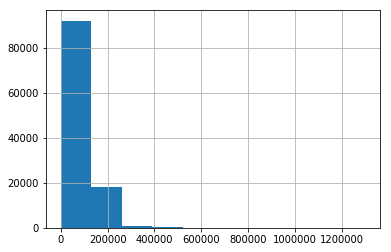

In [13]:
df.WAGE_RATE_OF_PAY_FROM.hist()

#### *Exercise:* Which ten employers hired the most workers?

In [14]:
# todo: top 10 employers by visa count

## Slicing and Dicing

#### To get information relevant to our class, we'll need find a little more detail on particular employers, jobs, and locations. 

Pandas has a deep arrays of tools that allow for a wide range of in-memory filtering and data extraction, including SQL-like functionality. As is the case with many pandas functions, there is often more than one way to do the same thing.  

Generally, the best way to query data frames is using the [`.loc[]`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html) functionality, essentially allows the user to enter conditions filtering the rows and columns.   

In [15]:
df.loc[(df.WORKSITE_CITY=='NEW YORK'), 'JOB_TITLE'].value_counts().head(10)

ASSOCIATE                    279
VICE PRESIDENT               181
SOFTWARE ENGINEER            176
SOFTWARE DEVELOPER           139
SENIOR SOFTWARE ENGINEER     120
ARCHITECT                     68
HOUSE STAFF, RESIDENT         64
ADVISORY SENIOR ASSOCIATE     62
MANAGER                       61
CONSULTANT                    59
Name: JOB_TITLE, dtype: int64

In [16]:
df.EMPLOYER_NAME.loc[(df.JOB_TITLE=='DATA SCIENTIST')].value_counts().head(10)

FACEBOOK, INC.                            42
MICROSOFT CORPORATION                      8
APPLE INC.                                 6
AMAZON WEB SERVICES, INC.                  5
AIRBNB, INC.                               5
FORD MOTOR COMPANY                         5
MEMORIAL SLOAN-KETTERING CANCER CENTER     4
INCEDO INC                                 2
AIM BIG INC                                2
IBM CORPORATION                            2
Name: EMPLOYER_NAME, dtype: int64

#### *Exercise:* Which ten employers hired the most workers with salaries over $100,000?


In [17]:
# todo: top 10 employers by visa count for salaries over $100,000

## Advanced Functionality

Pandas also has functionality to handle more complex datatypes, including:
1. Time functionality to handle dates. 
2. Regular expression functionality to handle text 

##### Let's first do some basic transformations of some of our columns to make them easier to work with:

In [18]:
# Some of our date columns are a little problematic:
print(df.CASE_SUBMITTED.values[:5])

# These looks a lot like strings, but we can transform them to dates, or "datetime" objects in pandas
print(pd.to_datetime(df.CASE_SUBMITTED).values[:5])

# To make these easier to work with, we can create a new column for the transformed date
df['submission_date'] = pd.to_datetime(df.CASE_SUBMITTED)

['2018-04-01' '2018-04-02' '2018-04-02' '2018-04-02' '2018-04-02']
['2018-04-01T00:00:00.000000000' '2018-04-02T00:00:00.000000000'
 '2018-04-02T00:00:00.000000000' '2018-04-02T00:00:00.000000000'
 '2018-04-02T00:00:00.000000000']


##### Now let's look at how we can use the datetime functionality to do some advanced filtering:

In [19]:
# Let's filter our set down to all of the records submitted in June 2018
time_mask = (df.submission_date.dt.year==2018) & (df.submission_date.dt.month==6)

df.loc[time_mask, 'JOB_TITLE'].value_counts().head(10)

SOFTWARE DEVELOPER                     1278
SOFTWARE ENGINEER                      1218
SENIOR SOFTWARE ENGINEER                551
ASSISTANT PROFESSOR                     470
DEVELOPER                               331
PROGRAMMER ANALYST                      329
SENIOR CONSULTANT                       262
TECHNOLOGY LEAD - US - PRACTITIONER     254
SYSTEMS ANALYST                         226
SENIOR SOFTWARE DEVELOPER               207
Name: JOB_TITLE, dtype: int64

##### Pandas also includes built-in string handling, including [regular expression](https://pythex.org/) searches. 

We're primarily interested in data roles, so let's only look at the top firms hiring for those roles.

In [20]:
data_roles = df.JOB_TITLE.str.contains(r'DATA')

df.loc[data_roles, 'EMPLOYER_NAME'].value_counts().head(10)

TATA CONSULTANCY SERVICES LIMITED    140
FACEBOOK, INC.                        82
AMAZON WEB SERVICES, INC.             54
AMAZON.COM SERVICES, INC.             41
MICROSOFT CORPORATION                 34
ERNST & YOUNG U.S. LLP                30
CAPGEMINI AMERICA INC                 30
IBM INDIA PRIVATE LIMITED             29
CAPITAL ONE SERVICES, LLC             23
APPLE INC.                            20
Name: EMPLOYER_NAME, dtype: int64

We can combine the mask we created in the preceding cell to find the top data roles with applications submitted in June.

In [21]:
df.loc[data_roles & time_mask, 'JOB_TITLE'].value_counts().head(10)

DATABASE ADMINISTRATOR           132
DATA SCIENTIST                    62
DATA ENGINEER                     34
DATA WAREHOUSE SPECIALIST         33
DATA ANALYST                      33
SENIOR DATA ENGINEER              21
DATABASE DEVELOPER                16
SENIOR DATA ANALYST               15
SENIOR DATA SCIENTIST             14
ORACLE DATABASE ADMINISTRATOR     13
Name: JOB_TITLE, dtype: int64

#### *Exercise:* What are the top worksites for "engineers"?


In [22]:
# todo: top 10 cities for workers in "engineer" roles

All super useful tricks. One last useful set:

## Grouping and Calculating Summary Stats

Our last task will be to explore the [`groupby()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) and [`.agg()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.core.groupby.DataFrameGroupBy.agg.html) functionality to calculate some basic stats on slices of data, along with the [`sort_values()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html) to get a sense to the top ranking values.

Let's face it, we're interest in how much folks in data roles get paid. Let's take a look.


In [23]:
df.loc[data_roles, 'WAGE_RATE_OF_PAY_FROM'].median()

95808.0

Great, that gives a general sense of the median pay for data roles, but how does that differ by role?

In [24]:
df.loc[data_roles, ['JOB_TITLE', 'WAGE_RATE_OF_PAY_FROM']].groupby('JOB_TITLE').median()

,WAGE_RATE_OF_PAY_FROM
JOB_TITLE,
.NET DATABASE ADMIN,80000.00
ACCESS DATABASE DEVELOPER,27.18
"ADMINISTRATOR 4, DATABASE ADMINISTRATION",103500.00
ADMINISTRATOR DATABASE 3,94000.00
ADMISSIONS CRM DATABASE ADMINISTRATOR,51000.00
ADVANCED DATA SCIENTIST,160000.00
"ADVANCED DATA SCIENTIST, LEAD",98000.00
ADVANCED DATA WAREHOUSE ADMINISTRATOR,119164.58
ADVANCED DATABASE ADMINISTRATOR,49.00


Cool, but way too much information. Let's sort this by the pay column. 

In [25]:
(df.loc[data_roles, ['JOB_TITLE', 'WAGE_RATE_OF_PAY_FROM']]
 .groupby('JOB_TITLE')
 .median()
 .sort_values(by='WAGE_RATE_OF_PAY_FROM', ascending=False)
 .head(10)
)

,WAGE_RATE_OF_PAY_FROM
JOB_TITLE,
"SR. DIRECTOR, RETAIL DATA SCIENCE",300000.00
"VICE PRESIDENT, DATA",230000.00
"MANAGER, DATA ANALYTICS STRATEGY & ADVANCED ANALYTICS",214117.56
SENIOR DATA ARCHITECT/ENGINEER,210000.00
"VP, DATA AND MEDIA SOLUTIONS",210000.00
"DATA SCIENCE MANAGER, ANALYTICS",203205.00
"DIRECTOR, DATA SCIENCE",200000.00
SENIOR DATA PLATFORM ENGINEER,200000.00
"VICE PRESIDENT, MARKETING DATA OPERATIONS",197000.00


Big numbers, but how many visas were issued for this purpose? For this, we can use `agg()`:

In [26]:
(df.loc[data_roles, ['JOB_TITLE', 'WAGE_RATE_OF_PAY_FROM']]
 .groupby('JOB_TITLE')
 .agg(['median', 'count'])
 .sort_values(by=('WAGE_RATE_OF_PAY_FROM', 'median'), ascending=False)
 .head(10)
)

WAGE_RATE_OF_PAY_FROM      
                                                                  median count
JOB_TITLE                                                                     
SR. DIRECTOR, RETAIL DATA SCIENCE                              300000.00     1
VICE PRESIDENT, DATA                                           230000.00     1
MANAGER, DATA ANALYTICS STRATEGY & ADVANCED ANA...             214117.56     1
SENIOR DATA ARCHITECT/ENGINEER                                 210000.00     1
VP, DATA AND MEDIA SOLUTIONS                                   210000.00     1
DATA SCIENCE MANAGER, ANALYTICS                                203205.00     1
DIRECTOR, DATA SCIENCE                                         200000.00     3
SENIOR DATA PLATFORM ENGINEER                                  200000.00     1
VICE PRESIDENT, MARKETING DATA OPERATIONS                      197000.00     1
STAFF DATA ENGINEER                                            197000.00     1

#### *Exercise:* What are the top firms for data **scientists**? How many data scientists are being hired there? How much are they getting paid?


In [27]:
# todo: top 10 firms for data scientists, with median pay and visa count

## Time Permitting: What's Interesting Here?